### Crop Row Detection using UNet

In [69]:
##Importing necessary libraries
import PIL
import numpy as np
import torch
import pandas as pd  

In [70]:
import tensorflow as tf
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import time
import glob 
import random

In [71]:
##Dir path
img_width = 320
img_height = 240
img_channels = 3
number_of_init_filters = 16
train_input_path = 'C:/Users/prasa/Desktop/Kaggle/detecting-crop-rows-from-image-data/Images/trainfolder/*.JPG'
train_output_path = 'C:/Users/prasa/Desktop\Kaggle/detecting-crop-rows-from-image-data/Images/train_labels1/*.JPG'
test_input_path = 'C:/Users/prasa/Desktop/Kaggle/detecting-crop-rows-from-image-data/Images/testfolder/*.JPG'

In [72]:
#loading the images
img_list_X_train = sorted(glob.glob(train_input_path))
X_train = np.zeros((len(img_list_X_train), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_train):
    # read image
    img_train = imread(img_path)
    img_train = resize(img_train, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
    X_train[i] = img_train

In [73]:
#loading the image labels
img_list_y_train = sorted(glob.glob(train_output_path))
y_train = np.zeros((len(img_list_y_train), img_height, img_width, 1), dtype=np.bool)
for i, img_path in enumerate(img_list_y_train):
    # read image
    img_train = imread(img_path)
    img_train = resize(img_train, (img_height, img_width, 1), mode='constant', preserve_range='True')
    y_train[i] = img_train

C:\Users\prasa\AppData\Local\Temp\ipykernel_24860\1568402843.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.zeros((len(img_list_y_train), img_height, img_width, 1), dtype=np.bool)


In [74]:
#Testing images input
img_list_X_test = sorted(glob.glob(test_input_path))
X_test = np.zeros((len(img_list_X_test), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_test):
    # read image
    img_test = imread(img_path)
    img_test = resize(img_test, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
    X_test[i] = img_test

In [ ]:
# #Testing images 

# img_list_y_test = sorted(glob.glob(test_expected_output))
# y_test = np.zeros((len(img_list_y_test), img_height, img_width, 1), dtype=np.bool)
# for i, img_path in enumerate(img_list_y_test):
#     # read image
#     img_test = imread(img_path)
#     img_test = resize(img_test, (img_height, img_width, 1), mode='constant', preserve_range='True')
#     y_test[i] = img_test

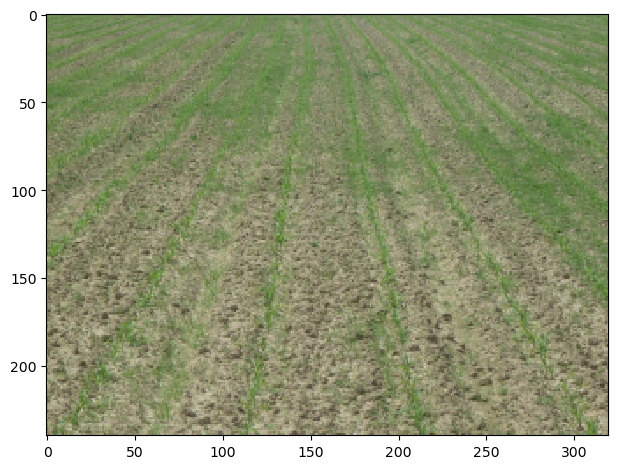

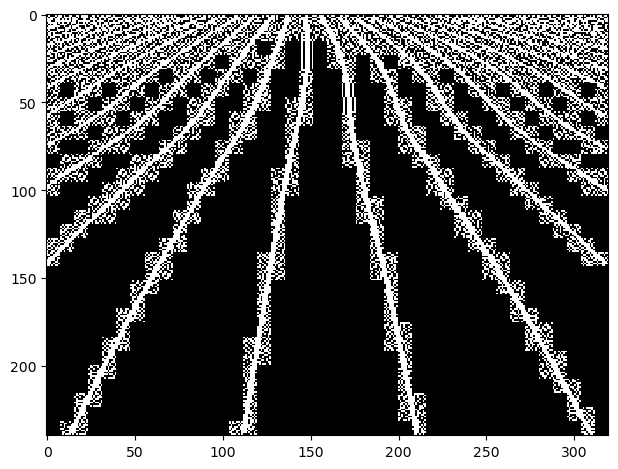

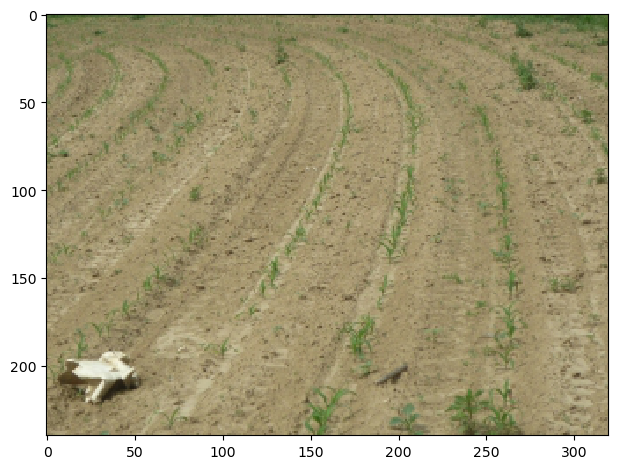

In [7]:
# Plotting the images using imshow
ix = random.randint(0, len(img_list_X_train))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(y_train[ix]))
plt.show()
imshow(np.squeeze(X_test[random.randint(0, len(img_list_X_test)-1)]))
plt.show()


### Building the Unet architecture

In [75]:
inputs = tf.keras.layers.Input(shape=(img_height, img_width, img_channels), name="input_image")
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

In [76]:
#Contractional path
cv1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), strides=(1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(s)
cv2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), strides=(1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(cv1)

#DS1
#fire module 1.1 
f1_1 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(cv2)
f1_1l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_1r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_1 = tf.keras.layers.concatenate([f1_1l,f1_1r])

#fire module 1.2
f1_2 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_2l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f1_2r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f1_2 = tf.keras.layers.concatenate([f1_2l,f1_2r])
f1_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1', padding="same")(f1_2)

In [77]:
#DS2
#fire module 2.1 
f2_1 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f2_1l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_1r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_1 = tf.keras.layers.concatenate([f2_1l,f2_1r])

#fire module 2.2
f2_2 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_2l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f2_2r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f2_2 = tf.keras.layers.concatenate([f2_2l,f2_2r])
f2_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool2', padding="same")(f2_2)

In [78]:
#DS3
#fire module 3.1 
f3_1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f3_1l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_1r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_1 = tf.keras.layers.concatenate([f3_1l,f3_1r])

#fire module 3.2
f3_2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_2l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f3_2r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f3_2 = tf.keras.layers.concatenate([f3_2l,f3_2r])
f3_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3', padding="same")(f3_2)

In [79]:
#DS4
#fire module 4.1 
f4_1 = tf.keras.layers.Conv2D(number_of_init_filters*5, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f4_1l = tf.keras.layers.Conv2D(number_of_init_filters*32, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_1r = tf.keras.layers.Conv2D(number_of_init_filters*32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_1 = tf.keras.layers.concatenate([f4_1l,f4_1r])

#fire module 4.2
f4_2 = tf.keras.layers.Conv2D(number_of_init_filters*5, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_2l = tf.keras.layers.Conv2D(number_of_init_filters*32, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_2)
f4_2r = tf.keras.layers.Conv2D(number_of_init_filters*32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f4_2)
f4_2 = tf.keras.layers.concatenate([f4_2l,f4_2r])
f4_2 = tf.keras.layers.Dropout(0.5)(f4_2)

In [80]:
#US1
#Transposed fire module
tf1_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*5, (1,1), strides=(1,1), padding='same', activation='relu')(f4_2)
tf1_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*16, (1,1), strides=(1,1), padding='same', activation='relu')(tf1_1)
tf1_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*16, (2,2), strides=(1,1), padding='same', activation='relu')(tf1_1)
tf1_1 = tf.keras.layers.concatenate([tf1_1l,tf1_1r])
tf1_1 = tf.keras.layers.concatenate([tf1_1,f3_2])

#fire module 5.1 
f5_1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf1_1)
f5_1l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_1r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_1 = tf.keras.layers.concatenate([f5_1l,f5_1r])

#fire module 5.2
f5_2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_2l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_2)
f5_2r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f5_2)
f5_2 = tf.keras.layers.concatenate([f5_2l,f5_2r])

In [81]:
#US2
#Transposed fire module
tf2_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (1,1), strides=(2,2), padding='same', activation='relu')(f5_2)
tf2_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*8, (1,1), strides=(1,1), padding='same', activation='relu')(tf2_1)
tf2_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*8, (2,2), strides=(1,1), padding='same', activation='relu')(tf2_1)
tf2_1 = tf.keras.layers.concatenate([tf2_1l,tf2_1r])
tf2_1 = tf.keras.layers.concatenate([tf2_1,f2_2])

#fire module 6.1 
f6_1 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf2_1)
f6_1l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_1r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_1 = tf.keras.layers.concatenate([f6_1l,f6_1r])

#fire module 6.2
f6_2 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_2l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_2)
f6_2r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f6_2)
f6_2 = tf.keras.layers.concatenate([f6_2l,f6_2r])

In [82]:
#US3
#Transposed fire module
tf3_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*3, (1,1), strides=(2,2), padding='same', activation='relu')(f6_2)
tf3_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (1,1), strides=(1,1), padding='same', activation='relu')(tf3_1)
tf3_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (2,2), strides=(1,1), padding='same', activation='relu')(tf3_1)
tf3_1 = tf.keras.layers.concatenate([tf3_1l,tf3_1r])
tf3_1 = tf.keras.layers.concatenate([tf3_1,f1_2])

#fire module 6.1 
f7_1 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf3_1)
f7_1l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_1r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_1 = tf.keras.layers.concatenate([f7_1l,f7_1r])

#fire module 6.2
f7_2 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_2l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_2)
f7_2r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f7_2)
f7_2 = tf.keras.layers.concatenate([f7_2l,f7_2r])

In [83]:
t9 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (2,2), strides=(2,2), padding='same', activation='relu')(f7_2)
c1 = tf.keras.layers.concatenate([t9,cv2])
cv3 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
cv4 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(cv3)

In [84]:
outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(cv4)

In [85]:
###Model Summary 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 240, 320, 3)  0           ['input_image[0][0]']            
                                                                                                  
 conv2d_47 (Conv2D)             (None, 240, 320, 64  1792        ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

                                                                  'conv2d_66[0][0]']              
                                                                                                  
 pool3 (MaxPooling2D)           (None, 30, 40, 512)  0           ['concatenate_26[0][0]']         
                                                                                                  
 conv2d_67 (Conv2D)             (None, 30, 40, 80)   41040       ['pool3[0][0]']                  
                                                                                                  
 conv2d_68 (Conv2D)             (None, 30, 40, 512)  41472       ['conv2d_67[0][0]']              
                                                                                                  
 conv2d_69 (Conv2D)             (None, 30, 40, 512)  369152      ['conv2d_67[0][0]']              
                                                                                                  
 concatena

                                                                                                  
 conv2d_83 (Conv2D)             (None, 60, 80, 128)  6272        ['conv2d_82[0][0]']              
                                                                                                  
 conv2d_84 (Conv2D)             (None, 60, 80, 128)  55424       ['conv2d_82[0][0]']              
                                                                                                  
 concatenate_36 (Concatenate)   (None, 60, 80, 256)  0           ['conv2d_83[0][0]',              
                                                                  'conv2d_84[0][0]']              
                                                                                                  
 conv2d_transpose_16 (Conv2DTra  (None, 120, 160, 48  12336      ['concatenate_36[0][0]']         
 nspose)                        )                                                                 
          

In [1]:
### Model for 70 epochs and a batch size of 5

In [86]:
#Model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

name = "SqueezeUnet-{}".format(int(time.time()))
callbacks = [ 
        tf.keras.callbacks.EarlyStopping(patience=9),
        tf.keras.callbacks.TensorBoard(log_dir='tensorboard/{}'.format(name))]

results = model.fit(X_train, y_train, validation_split=0.1, batch_size=5, epochs=70, callbacks=callbacks)

Epoch 1/70
38/38 [==============================] - 248s 6s/step - loss: 0.4868 - accuracy: 0.8093 - val_loss: 0.5041 - val_accuracy: 0.7935
Epoch 2/70
38/38 [==============================] - 244s 6s/step - loss: 0.4547 - accuracy: 0.8095 - val_loss: 0.4957 - val_accuracy: 0.7934
Epoch 3/70
38/38 [==============================] - 235s 6s/step - loss: 0.4505 - accuracy: 0.8096 - val_loss: 0.4954 - val_accuracy: 0.7935
Epoch 4/70
38/38 [==============================] - 255s 7s/step - loss: 0.4401 - accuracy: 0.8092 - val_loss: 0.5245 - val_accuracy: 0.7884
Epoch 5/70
38/38 [==============================] - 239s 6s/step - loss: 0.4314 - accuracy: 0.8094 - val_loss: 0.5848 - val_accuracy: 0.7935
Epoch 6/70
38/38 [==============================] - 217s 6s/step - loss: 0.4370 - accuracy: 0.8087 - val_loss: 0.5104 - val_accuracy: 0.7930
Epoch 7/70
38/38 [==============================] - 230s 6s/step - loss: 0.4354 - accuracy: 0.8090 - val_loss: 0.5383 - val_accuracy: 0.7934
Epoch 8/70
38

In [20]:
model.save("SqueezeUnet.h5")

In [21]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

3/3 [==============================] - 21s 6s/step


In [22]:
preds_train_t = (preds_train >0.5).astype(np.uint8)
preds_val_t = (preds_val >0.5).astype(np.uint8)
preds_test_t = (preds_test >0.5).astype(np.bool)

C:\Users\prasa\AppData\Local\Temp\ipykernel_24860\1790041503.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  preds_test_t = (preds_test >0.5).astype(np.bool)


71
[[[[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [ True]
   [False]
   [False]]

  ...

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]]


 [[[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [ True]
   [False]
   [False]]

  ...

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]]


 [[[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[

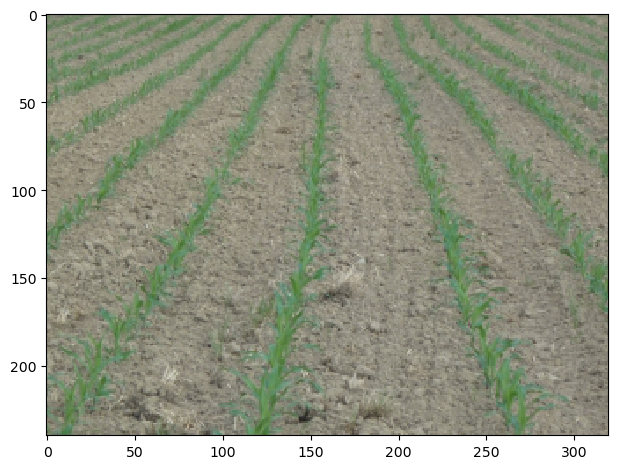

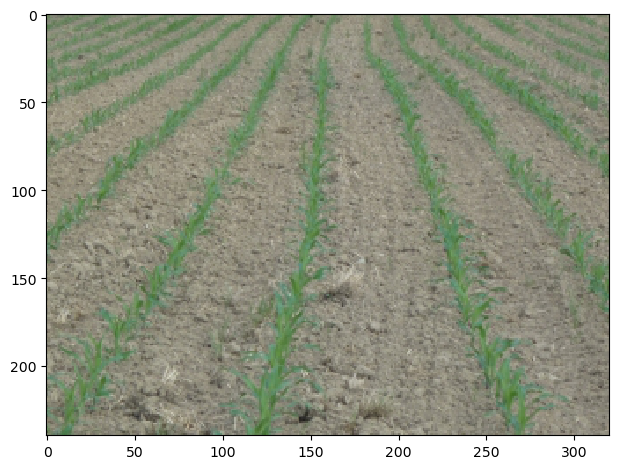

In [23]:
print(len(preds_test_t))
print(preds_test_t)
print(type(preds_test_t[0]))
idx = random.randint(0, len(preds_test_t)-1)
imshow(X_test[idx])
plt.show()
imshow(preds_test_t[idx])
im = preds_test_t[idx]
from PIL import Image


imshow(X_test[idx])


In [35]:
len(preds_test_t)

71

In [55]:
print(preds_test_t[0].shape)

(240, 320, 1)


In [56]:
def encode_mask_to_rle(mask):
    '''
    mask: numpy array binary mask 
    255 - mask 
    0 - background
    Returns encoded run length 
    '''
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    
    return ' '.join(str(x) for x in runs)


def decode_rle_to_mask(rle, height = 240, width = 320):
    '''
    rle : run-length as string formated (start value, count)
    height : height of the mask 
    width : width of the mask
    returns binary mask
    '''
    rle = np.array(rle.split(' ')).reshape(-1, 2)
    mask = np.zeros((height*width))
    color = 255
    for i in rle:
        mask[int(i[0]):int(i[0])+int(i[1])] = color

    return mask.reshape(height, width)


In [57]:
encode_ls = []
for each_mask in preds_test_t:
    arr = encode_mask_to_rle(each_mask)
    encode_ls.append(arr)

In [59]:
train_test_ids = pd.read_csv(r"C:\Users\prasa\Desktop\Kaggle\detecting-crop-rows-from-image-data\train and test ids.csv")

In [60]:
test_ids = list(train_test_ids['test_ids'])

In [61]:
test_ids = test_ids[:71]

In [62]:
##Creating dataframe with lables and ids
df=pd.DataFrame(list(zip(test_ids, encode_ls)),
              columns=['id','labels'])

In [65]:
df

,id,labels
0,162.0,760 1 762 1 772 1 783 2 794 3 810 3 822 1 824 ...
1,19.0,658 1 660 1 684 1 686 1 688 1 690 1 700 1 708 ...
2,75.0,776 1 780 1 784 1 812 1 848 1 852 1 896 1 900 ...
3,244.0,852 1
4,101.0,
...,...,...
66,69.0,684 1 756 1 778 3 800 1 802 1 824 1 848 1 872 ...
67,18.0,666 1 668 1 730 1 732 1 748 1 750 1 804 1 824 ...
68,257.0,696 1 834 1 836 1 848 1 850 1 852 1 871 1 873 ...
69,134.0,648 1 652 1 656 1 658 1 660 1 662 1 664 1 668 ...


In [66]:
df.id = df.id.astype(int)

In [67]:
df

,id,labels
0,162,760 1 762 1 772 1 783 2 794 3 810 3 822 1 824 ...
1,19,658 1 660 1 684 1 686 1 688 1 690 1 700 1 708 ...
2,75,776 1 780 1 784 1 812 1 848 1 852 1 896 1 900 ...
3,244,852 1
4,101,
...,...,...
66,69,684 1 756 1 778 3 800 1 802 1 824 1 848 1 872 ...
67,18,666 1 668 1 730 1 732 1 748 1 750 1 804 1 824 ...
68,257,696 1 834 1 836 1 848 1 850 1 852 1 871 1 873 ...
69,134,648 1 652 1 656 1 658 1 660 1 662 1 664 1 668 ...


In [68]:
df.to_csv('submission.csv')